In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
hf_higgs= h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf_qcd = h5py.File('qcd_100000_pt_250_500.h5', 'r')

with h5py.File('qcd_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

with h5py.File('higgs_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

qcd_100000_pt_250_500
higgs_100000_pt_250_500


In [4]:
higgs_data = np.array(hf_higgs.get('higgs_100000_pt_250_500'))
qcd_background_data = np.array(hf_qcd.get('qcd_100000_pt_250_500'))
higgs_data

array([[ 4.72074292e+02,  1.37051933e-01, -2.53514528e+00, ...,
         3.83473901e-01,  6.16674158e-01,  5.57406805e-01],
       [ 4.70405678e+02, -3.91569464e-02,  6.96687614e-02, ...,
         3.13239811e-01,  8.25308189e-01,  7.04650207e-01],
       [ 4.38008357e+02, -1.81138694e-01, -3.03108291e+00, ...,
         4.39916683e-01,  4.96338176e-01,  4.87496134e-01],
       ...,
       [ 4.66920808e+02, -8.05493156e-01, -7.54702707e-01, ...,
         6.57692767e-01,  6.96196368e-01,  1.80727311e-02],
       [ 4.71611853e+02,  8.01812583e-01, -3.07788313e+00, ...,
         4.19343355e-01,  8.60960496e-01,  6.41891786e-01],
       [ 4.67029906e+02, -4.32315077e-01,  2.48393869e+00, ...,
         5.58198696e-01,  8.95642894e-01,  8.55158017e-01]])

In [5]:
higgs_data_1 = pd.DataFrame(data=higgs_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
qcd_background_data_1 = pd.DataFrame(data=qcd_background_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

higgs_data = higgs_data_1
qcd_background_data = qcd_background_data_1

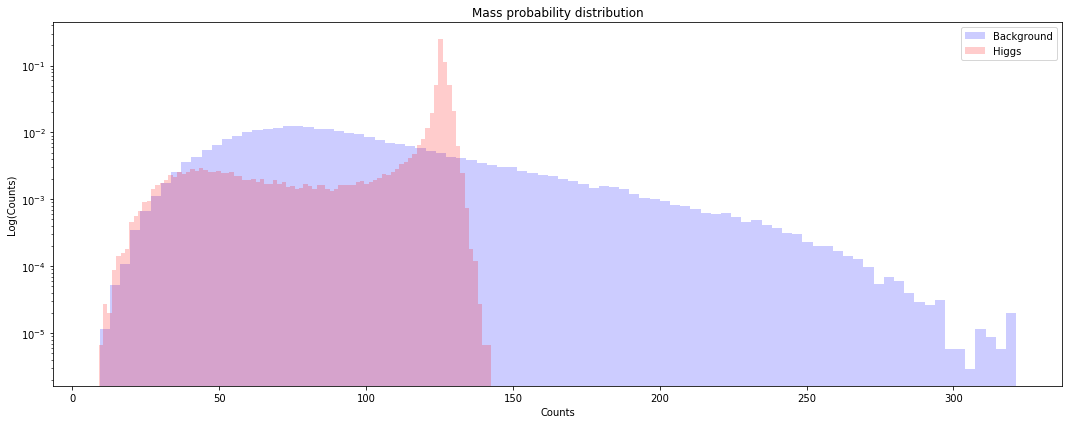

In [6]:
bins = 90; alph = .2 
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_data['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
fig.tight_layout()

Without even cutting the data, in a given window of collecting daya there exists a background that should be measured around 20000 times. Within the same window there exist 100 actual higgs boson signal measurements. Now, I will create a poisson distribution with an average rate of 20000, and determine the signficance of measuring 100 signal particles given the average rate

The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


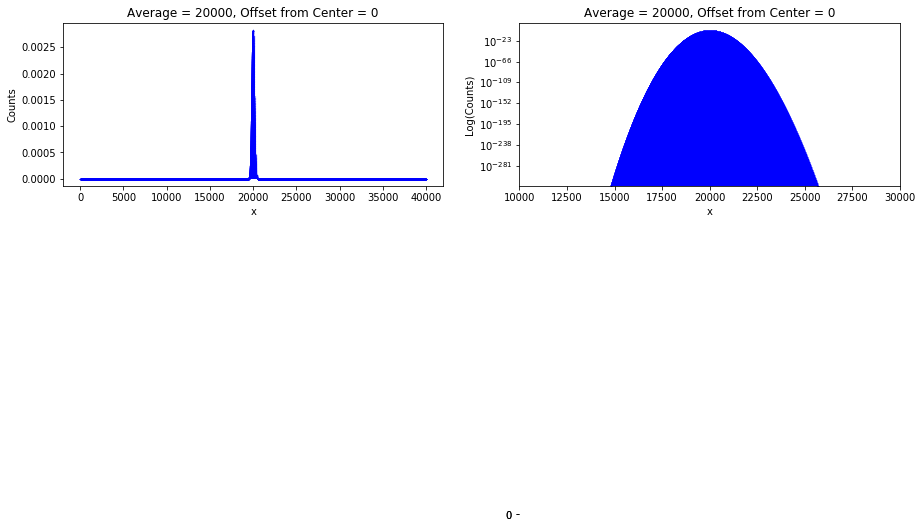

In [7]:
mu = 20000; sigma = 0; siz = 100000
distro = stats.poisson.rvs(mu, sigma, size = siz)
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15,3))
                          
ax.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x = np.linspace(0, 2*mu, 2*mu+1)
ax.plot(x,stats.poisson.pmf(x,mu,sigma), 'b.', ms=.5, alpha = .5)
ax.vlines(x, 0, stats.poisson.pmf(x, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured = np.linspace(0, 100, 101)
ax.fill_between(measured, stats.poisson.pmf(measured, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax.set_xlabel('x')
ax.set_ylabel('Counts')

ax1.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x1 = np.linspace(0, 2*mu, 2*mu+1)
ax1.plot(x1, stats.poisson.pmf(x1,mu,sigma), 'b.', ms=.5, alpha = .5)
ax1.vlines(x1, 0, stats.poisson.pmf(x1, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured1 = np.linspace(0, 100, 101)
ax1.fill_between(measured1, stats.poisson.pmf(measured1, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax1.set_xlabel('x')
ax1.set_xlim([10000, 30000])
ax1.set_ylabel('Log(Counts)')
ax1.set_yscale('log')

prob = 1 - stats.poisson.cdf(100, mu, sigma)
z = (stats.norm.ppf(1-(prob)))

print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

This is actual quite impressive with what are results are. The detection here is so small that my computer does not even recoginize that there higgs data that was statistically different from my background data. Thus, we really need to shave some background data to increase the sensitivity of the detection of the higgs data. In order for this to change, we would need to cut the background distribution to around 10 from 20000 to get a 5$\sigma$ detection. By taking more and more cuts, we are able to remove more and more background to increase the sensitivity of the higgs measurement

In [172]:
qcd_background_mass_cut = qcd_background_data.query(f' 20 < mass < 130')
higgs_data_mass_cut = higgs_data.query(f' 20 < mass < 130')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 19.3690%
 Percent cut from higgs data: 2.3350%


The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


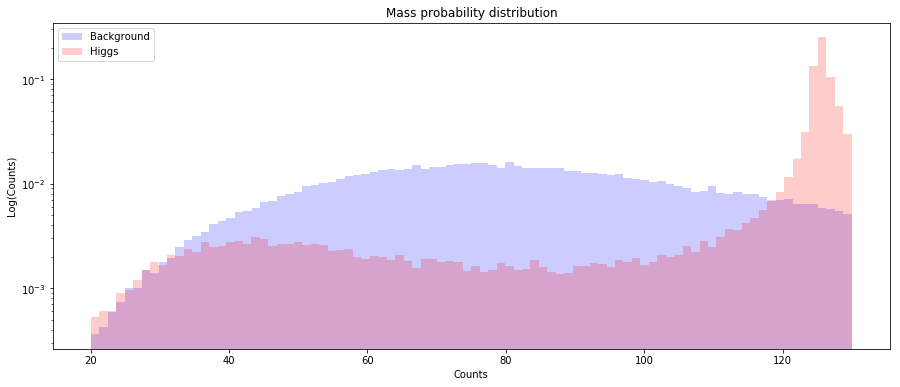

In [173]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

In [174]:
qcd_background_mass_cut = qcd_background_data.query(f' 100 < mass < 130')
higgs_data_mass_cut = higgs_data.query(f' 100 < mass < 130')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 81.1020%
 Percent cut from higgs data: 17.2710%


The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


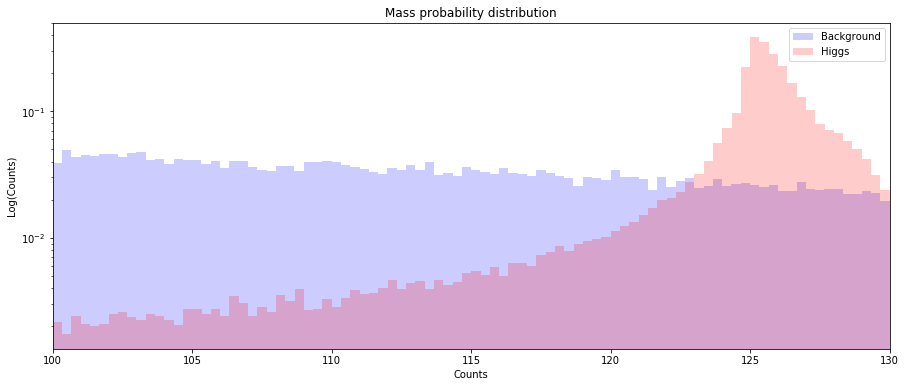

In [175]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(100,130)

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

In [176]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.9 < mass < 125.5')
higgs_data_mass_cut = higgs_data.query(f' 124.9 < mass < 125.5')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 99.6950%
 Percent cut from higgs data: 81.0090%


The probability that a signal will be falsely recorded as a background: 1.0000
Sigma value for the above percentage is: -6.3665


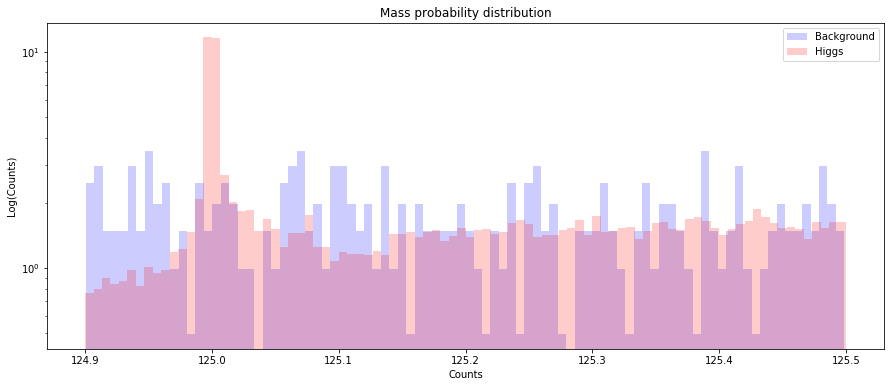

In [177]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

I finally was able to get a sigma value, but it needs to be a positive number. The reason being is that I will see significantly more higgs particles than expected background particles if I get a positive sigma value. I will try to shoot for a 5$\sigma$ value. 

In [178]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.99 < mass < 125.03')
higgs_data_mass_cut = higgs_data.query(f' 124.99 < mass < 125.03')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 99.9810%
 Percent cut from higgs data: 95.9580%


The probability that a signal will be falsely recorded as a background: 0.3322
Sigma value for the above percentage is: 0.4340


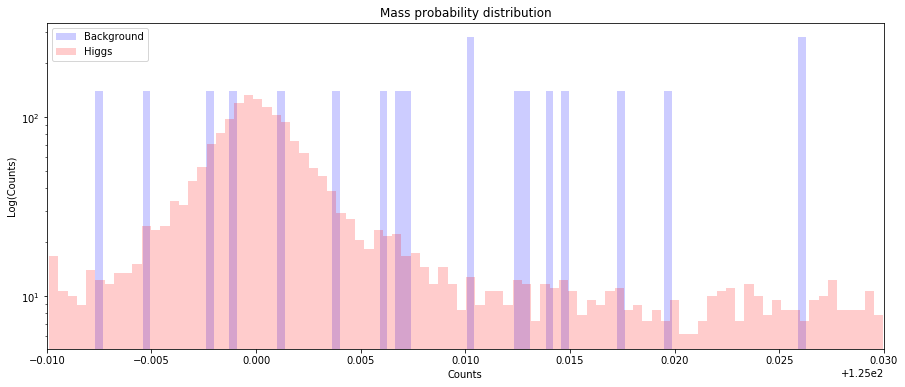

In [179]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.set_xlim([124.99, 125.03])
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

Dang, this is starting to look pretty good and something I can work with. I was able to cut out about 95.72% of my signal data and remove close to 99.981% of my background data in order to get a positive sigma value. In order to get to 5$\sigma$ I need to narrow down this even more

In [180]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.99 < mass < 125.005')
higgs_data_mass_cut = higgs_data.query(f' 124.99 < mass < 125.005')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 99.9940%
 Percent cut from higgs data: 97.0580%


The probability that a signal will be falsely recorded as a background: 0.1205
Sigma value for the above percentage is: 1.1724


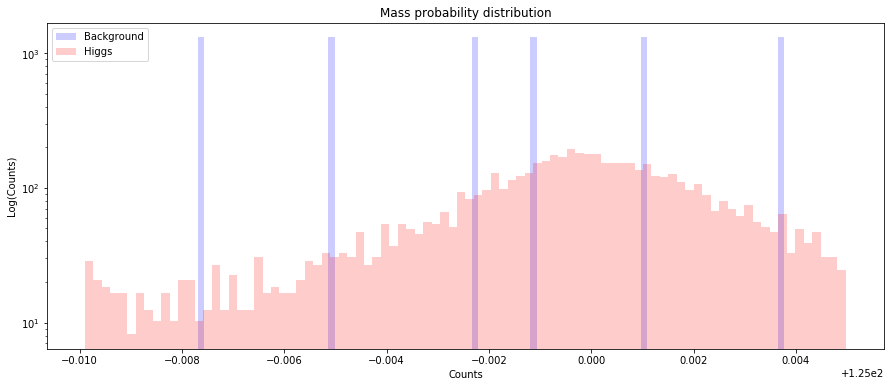

In [181]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

In [182]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.9959 < mass < 125.0037')
higgs_data_mass_cut = higgs_data.query(f' 124.9959 < mass < 125.0037')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 99.9970%
 Percent cut from higgs data: 97.5600%


The probability that a signal will be falsely recorded as a background: 0.0231
Sigma value for the above percentage is: 1.9933


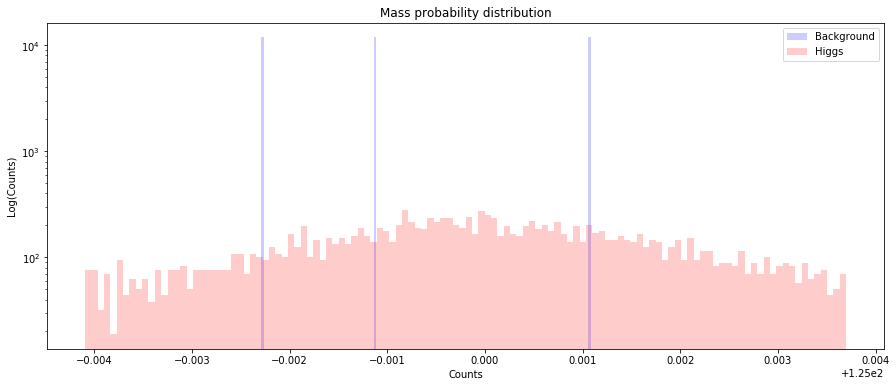

In [183]:
bins = 120; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

Well this is the best I am going to do is get around 1.9933$\sigma$. The reason being is that I have too much background data near where I am taking cuts. I could get a 5$\sigma$ value, but my cuts would be so small that it would not be worth it. The reason being is that the will be so small that it won't yield a meaningful result even though I can obtain a 5$\sigma$ value. 

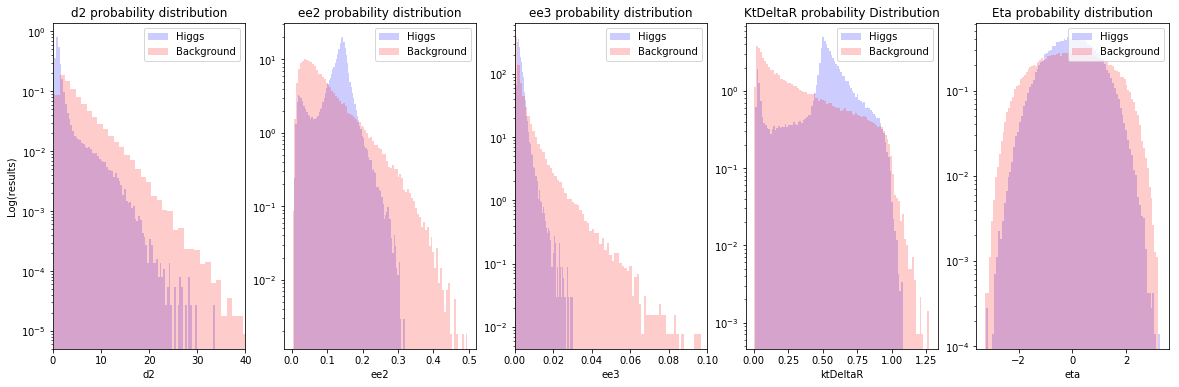

In [184]:
bins = 90; alph = .2
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (20, 6))
ax.hist(higgs_data['d2'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax.hist(qcd_background_data['d2'], bins, alpha = alph, density = True, color='r', label='Background')
ax.set_yscale('log')
ax.set_title('d2 probability distribution'); 
ax.set_xlabel('d2')
ax.set_ylabel('Log(results)')
ax.set_xlim([0,40])
ax.legend()

ax1.hist(higgs_data['ee2'], bins, alpha = alph, density = True, color='b', label='Higgs' )
ax1.hist(qcd_background_data['ee2'], bins, alpha = alph, density = True, color='r', label='Background')
ax1.set_yscale('log')
ax1.set_title('ee2 probability distribution')
ax1.set_xlabel('ee2')
ax1.legend()

ax2.hist(higgs_data['ee3'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax2.hist(qcd_background_data['ee3'], bins, alpha = alph, density = True, color='r', label='Background')
ax2.set_yscale('log')
ax2.set_title('ee3 probability distribution')
ax2.set_xlabel('ee3')
ax2.set_xlim([0,.1])
ax2.legend()


ax3.hist(higgs_data['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax3.hist(qcd_background_data['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Background')
ax3.set_yscale('log')
ax3.set_title('KtDeltaR probability Distribution')
ax3.set_xlabel('ktDeltaR')
ax3.legend()

ax4.hist(higgs_data['eta'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax4.hist(qcd_background_data['eta'], bins, alpha = alph, density = True, color='r', label='Background')
ax4.set_yscale('log')
ax4.set_title('Eta probability distribution'); 
ax4.set_xlabel('eta')
ax4.legend()

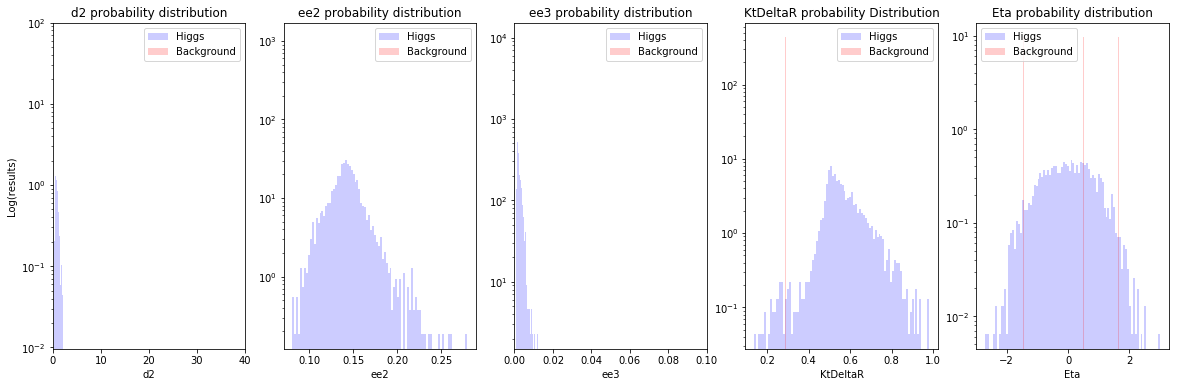

In [185]:
bins = 90; alph = .2
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (20, 6))
ax.hist(higgs_data_mass_cut['d2'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax.hist(qcd_background_mass_cut['d2'], bins, alpha = alph, density = True, color='r', label='Background')
ax.set_yscale('log')
ax.set_title('d2 probability distribution'); 
ax.set_xlabel('d2')
ax.set_ylabel('Log(results)')
ax.set_xlim([0,40])
ax.legend()

ax1.hist(higgs_data_mass_cut['ee2'], bins, alpha = alph, density = True, color='b', label='Higgs' )
ax1.hist(qcd_background_mass_cut['ee2'], bins, alpha = alph, density = True, color='r', label='Background')
ax1.set_yscale('log')
ax1.set_title('ee2 probability distribution')
ax1.set_xlabel('ee2')
ax1.legend()

ax2.hist(higgs_data_mass_cut['ee3'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax2.hist(qcd_background_mass_cut['ee3'], bins, alpha = alph, density = True, color='r', label='Background')
ax2.set_yscale('log')
ax2.set_title('ee3 probability distribution')
ax2.set_xlabel('ee3')
ax2.set_xlim([0,.1])
ax2.legend()


ax3.hist(higgs_data_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax3.hist(qcd_background_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Background')
ax3.set_yscale('log')
ax3.set_title('KtDeltaR probability Distribution')
ax3.set_xlabel('KtDeltaR')
ax3.legend()

ax4.hist(higgs_data_mass_cut['eta'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax4.hist(qcd_background_mass_cut['eta'], bins, alpha = alph, density = True, color='r', label='Background')
ax4.set_yscale('log')
ax4.set_title('Eta probability distribution'); 
ax4.set_xlabel('Eta')
ax4.legend()

These graphs above are plotting the higgs and background cuts, which I have made above, with respect to different metadata parameters. 

So it looks like ee2, ee3, and d2 here are pretty signal like without any background associated with it. I see that KtDeltaR has some background that I can maybe remove and Eta has quite a bit of background that I will try to remove. The whole purpose of this is to try to get my data as signal like as possible so I can perform further 

In [186]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.9959 < mass < 125.0037 and KtDeltaR > .3')
higgs_data_mass_cut = higgs_data.query(f' 124.9959 < mass < 125.0037 and KtDeltaR > .3')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 100.0000%
 Percent cut from higgs data: 97.5940%


/Users/mphenicie/Enter/lib/python3.6/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


The probability that a signal will be falsely recorded as a background: 0.0000
Sigma value for the above percentage is: inf


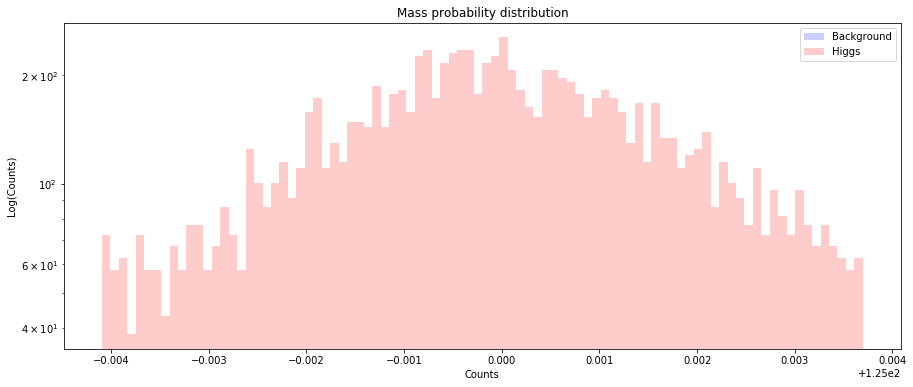

In [188]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

Awh, would you look at that. With the help of the KtDeltaR parameter I was able to remove all the background within the data and now contains only signal data. This is pretty cool because we can use this query to show where the true signal lays and can compare it to experiments where data is being collected. Let me try another query with Eta just for fun. 

In [199]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.9959 < mass < 125.0037 and -1.6 < eta < 1.8')
higgs_data_mass_cut = higgs_data.query(f' 124.9959 < mass < 125.0037 and -1.6 < eta < 1.8')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 99.9970%
 Percent cut from higgs data: 97.6720%


The probability that a signal will be falsely recorded as a background: 0.0231
Sigma value for the above percentage is: 1.9933


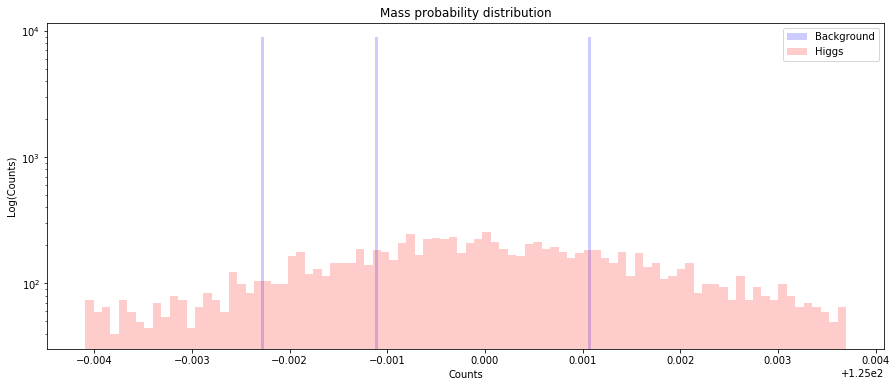

In [200]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

In [201]:
qcd_background_mass_cut = qcd_background_data.query(f' 124.9959 < mass < 125.0037 and -2 < eta < 2')
higgs_data_mass_cut = higgs_data.query(f' 124.9959 < mass < 125.0037 and -2 < eta < 2')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 99.9970%
 Percent cut from higgs data: 97.5870%


The probability that a signal will be falsely recorded as a background: 0.0231
Sigma value for the above percentage is: 1.9933


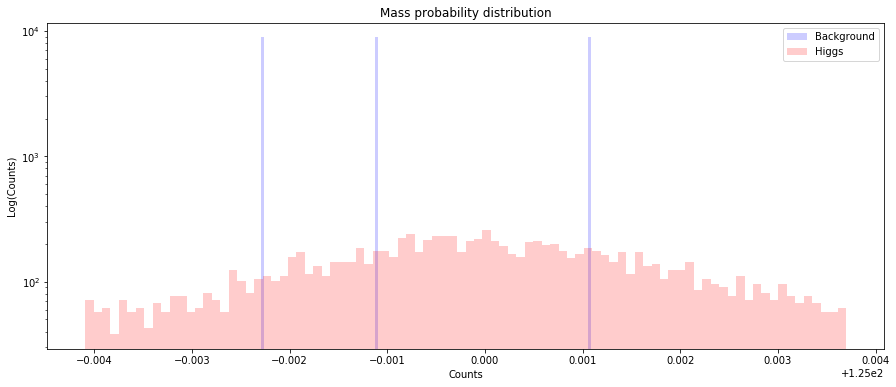

In [202]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()

prob = 1 - stats.poisson.cdf(100*higgs_cut, 20000*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

Even though I am taking different cuts with respect to Eta and KtDeltaR, it looks likes Eta has no impact on the calculated Sigma value of 1.9933, even after I had made cuts on the mass. But, KtDeltaR is able to be cut within the mass that the Sigma value is infinity, menaing that there is no possible way that background noise can be measured. 

The only thing that I am worried about is that I have made my cuts super super super small. By that I mean within .0078 within eachother. That seems like a very very fine line between signal and background data. I would assume that this could only be measured with super powerful computers and sensors that can account for this tiny variability. 